In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("USvideos.csv")

# Data Cleaning
df["description"] = df["description"].fillna("")

# Data Exploration
df.describe()


,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


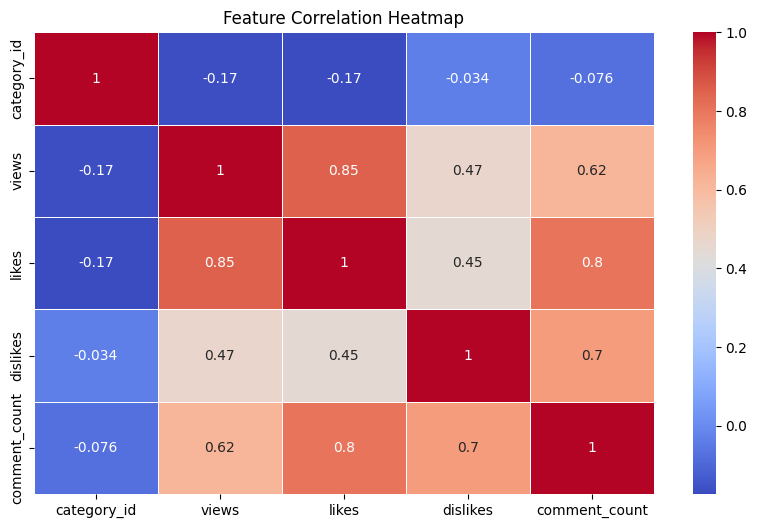

In [3]:
# Select only numeric columns before correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



In [ ]:
#Analyzing Title Capitalization
def contains_capitalized_word(s):
    return any(w.isupper() for w in s.split())

df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)
df["contains_capitalized"].value_counts()


contains_capitalized
False    22949
True     18000
Name: count, dtype: int64

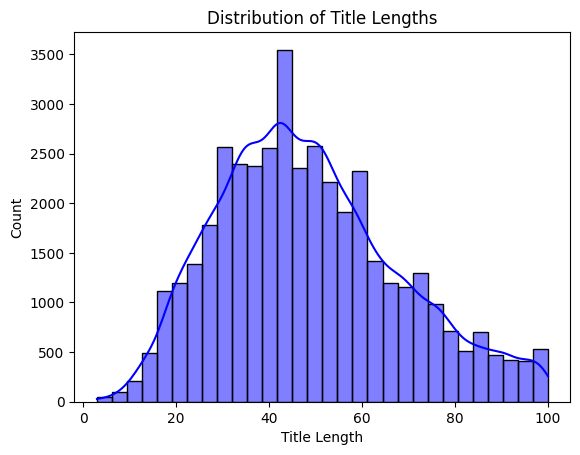

In [ ]:
#Visualizing Title Length Distribution
df["title_length"] = df["title"].apply(len)
sns.histplot(df["title_length"], bins=30, kde=True, color="blue")
plt.xlabel("Title Length")
plt.ylabel("Count")
plt.title("Distribution of Title Lengths")
plt.show()


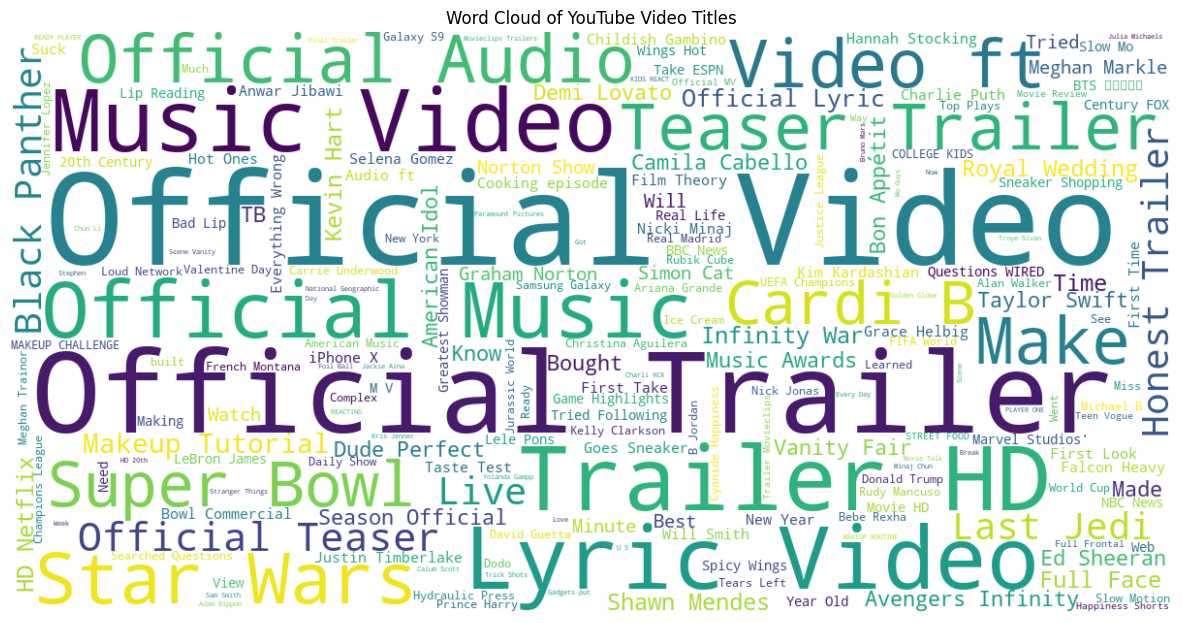

In [6]:
#Word Cloud for Common Words in Titles
title_words = " ".join(df["title"])
wc = wordcloud.WordCloud(width=1200, height=600, background_color="white").generate(title_words)

plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of YouTube Video Titles")
plt.show()


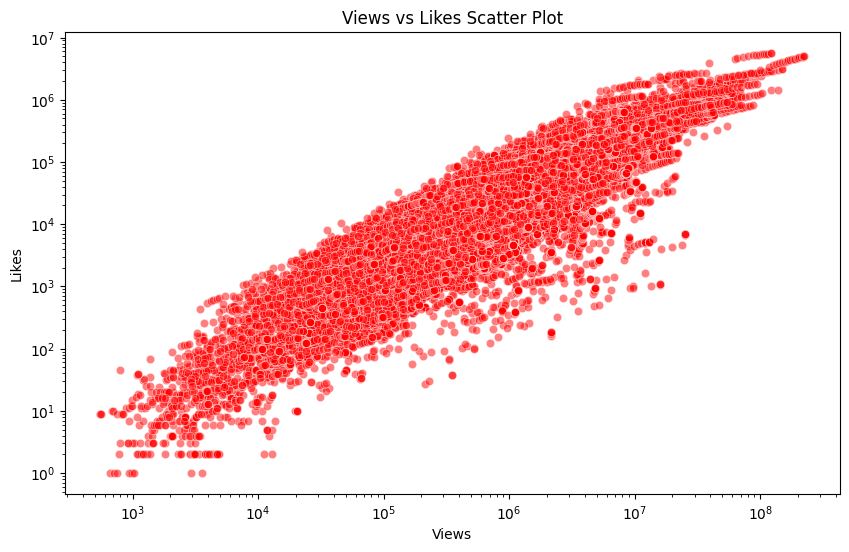

In [7]:
#Scatter Plot of Views vs Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["views"], y=df["likes"], alpha=0.5, color='red')
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("Views vs Likes Scatter Plot")
plt.xscale("log")
plt.yscale("log")
plt.show()


In [ ]:
#Predicting Popular Videos Based on Engagement
# Selecting features and target
features = df[["likes", "dislikes", "comment_count"]]
target = df["views"]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting views for test data
y_pred = model.predict(X_test)

# Evaluating Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")


Mean Absolute Error: 1186264.5574627263
R-squared Score: 0.777503276013677
